In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras import datasets, utils

In [2]:
(x_train, y_train), (x_test, y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [6]:
y_train=utils.to_categorical(y_train,10)
y_test=utils.to_categorical(y_test,10)# the number of classes in this model are 10 thus we label encode these to get the answer

In [7]:
from tensorflow.keras import layers, models

In [24]:
#CNN model
input_layer=layers.Input((32,32,3))
x=layers.Conv2D(filters=32, kernel_size=3,strides=1, padding='same')(input_layer)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

# layer 2
x=layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

#layer 3
x=layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

#layer 4
x=layers.Conv2D(filters=64, kernel_size=3,strides=2, padding='same')(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)

#Falttening the layers
x=layers.Flatten()(x)

x=layers.Dense(units=128)(x)
x=layers.BatchNormalization()(x)
x=layers.LeakyReLU()(x)
#to regularize the data so in order to prevent overfitting
x=layers.Dropout(rate=0.5)(x)

output_layer=layers.Dense(10, activation='softmax')(x)

model=models.Model(input_layer,output_layer)

In [25]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_23 (LeakyReLU)           │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_24 (LeakyReLU)           │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_25 (LeakyReLU)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_26 (LeakyReLU)           │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_27 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,2

 Total params: 592,554 (2.26 MB)

 Trainable params: 591,914 (2.26 MB)

 Non-trainable params: 640 (2.50 KB)

In [14]:
from tensorflow.keras import optimizers

In [26]:
optimizer=optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train, batch_size=32,epochs=10,shuffle=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 94ms/step - accuracy: 0.3942 - loss: 1.7655
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 149s 96ms/step - accuracy: 0.5098 - loss: 1.3936
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 95ms/step - accuracy: 0.5689 - loss: 1.2262
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 199s 94ms/step - accuracy: 0.6139 - loss: 1.0979
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 95ms/step - accuracy: 0.6416 - loss: 1.0159
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 94ms/step - accuracy: 0.6657 - loss: 0.9561
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 95ms/step - accuracy: 0.6866 - loss: 0.9007
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 207s 99ms/step - accuracy: 0.7000 - loss: 0.8571
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 217s 108ms/step - accuracy: 0.7191 - loss: 0.8139
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 201s 107ms/step - accuracy: 0.7319 - loss: 0.7767


In [30]:
model.evaluate(x_test,y_test,batch_size=1000)

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 879ms/step - accuracy: 0.6823 - loss: 0.9270


[0.9344632029533386, 0.6782000064849854]

In [31]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


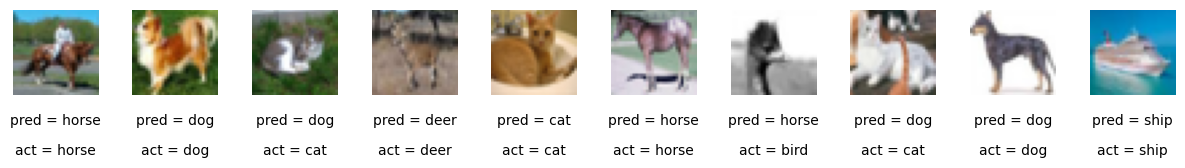

In [32]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)